# Processing with Aurora

The notebook will demonstrate how to process data using `Aurora`.


## Imports

Here we will be importing synthetic data for a noisy homogeneous half-space from MTH5.  

In [1]:
from mth5.data.make_mth5_from_asc import MTH5_PATH, create_test12rr_h5
from mth5.utils.helpers import close_open_files

from mtpy.processing.aurora.process_aurora import AuroraProcessing

## Create synthetic data
Load the synthetic data into an MTH5 which is the data format ingested by `Aurora`

In [2]:

mth5_path = create_test12rr_h5(force_make_mth5=False)


## Process with Aurora

Here we are demonstrating the most basic usage.  We are going to process a local station with a remote reference using default parameters and for a single sample rate of 1 sample per second. 

In [3]:
ap = AuroraProcessing()

ap.local_station_id = "test1"
ap.local_mth5_path = mth5_path
ap.remote_station_id = "test2"
ap.remote_mth5_path = mth5_path

In [4]:
help(ap.process)

Help on method process in module mtpy.processing.aurora.process_aurora:

process(sample_rates=None, processing_dict=None, merge=True, save_to_mth5=True) method of mtpy.processing.aurora.process_aurora.AuroraProcessing instance
    Need to either provide a list of sample rates to process or
    a processing dictionary.
    
    If you provide just the sample rates, then at each sample rate a
    KernelDataset will be created as well as a subsequent config object
    which are then used to process the data.
    
    If processing_dict is set then the processing will loop through the
    dictionary and use the provided config and kernel datasets.
    
    The processing dict has the following form
    
    .. code_block:: python
    
        processing_dict = {sample_rate: {
            "config": config object,
            "kernel_dataset": KernelDataset object,
            }
    
    If merge is True then all runs for all sample rates are combined into
    a single function according to 

In [5]:
tf_dict = ap.process([1])

2024-08-23T14:13:03.574946-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mth5\mth5\data\mth5\test12rr.h5
2024-08-23T14:13:03.574946-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column fc, adding and setting dtype to <class 'bool'>.
2024-08-23T14:13:03.574946-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column remote, adding and setting dtype to <class 'bool'>.
2024-08-23T14:13:03.574946-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column run_dataarray, adding and setting dtype to <class 'object'>.
2024-08-23T14:13:03.574946-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column stft, adding and setting dtype to <class 'object'>.
2024-08-23T14:13:03.574946-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame n

### The result

The returned object is a dictionary of the sample rates processed in the form

```
{ sample_rate: {"processed": bool, "tf": mtpy.MT}}
```

This will be important when processing more complex time series data that includes multiple sample rates.  

In [6]:
tf_dict

{1: {'processed': True,
  'tf': TF( survey='EMTF_Synthetic', station='test1', latitude=0.00, longitude=0.00, elevation=0.00 )}}

### Plot the result

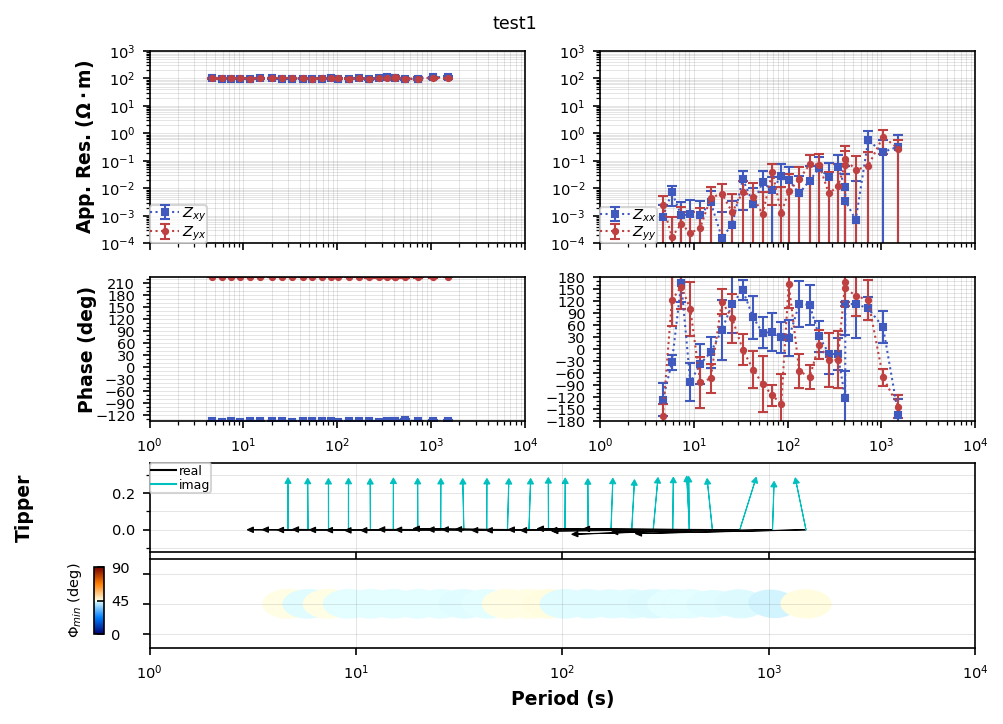

In [7]:
response_plot = tf_dict[1]["tf"].plot_mt_response(plot_num=2)